In [ ]:
#!pip install tensorflow-gpu==2.0.0

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
import tensorflow as tf 

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

In [ ]:

print("Tensorlfow Version: ", tf.__version__)

Tensorlfow Version:  2.9.2


In [ ]:
import  os
os.chdir('/content/drive/MyDrive/Potato_Leaf_Dieases')

In [ ]:
!dir

Dataset   le_net_model_40epochs.model.h5  potato_model.model_2.0.h5
Dataset1  potato_model_1.0.model.h5	  potato_model.model.h5
flagged   potato_model_1.model.h5	  Untitled0.ipynb


In [ ]:
Classes= ['Potato___Early_blight','Potato___healthy','Potato___Late_blight']


In [ ]:
trainPath='/content/drive/MyDrive/Potato_Leaf_Dieases/Dataset'

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
DATASET = "Dataset"  # this folder  contain two subfolder with images
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)


# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (256,256))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        

        if label == 'Potato___Early_blight':
            label = 0
        elif label == 'Potato___Late_blight':
            label = 1
        elif label == 'Potato___healthy':
            label = 2

        
        # print("pr: ", label)	

        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/2152 [00:00<?, ?it/s]

In [ ]:
data[0].shape

(256, 256, 3)

In [ ]:
labels

In [ ]:
data[0]

In [ ]:
data = np.array(data, dtype="float") / 255.0


In [ ]:
data

In [ ]:
labels = np.array(labels)
labels

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
trainX.shape

(1721, 256, 256, 3)

In [ ]:
testX.shape

(431, 256, 256, 3)

In [ ]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [ ]:
trainY

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
testY

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# create CNN Model

class LeNet:
   
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(32, (3,3), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(64, (3,3), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

         # third set of CONV => RELU => POOL layers
        model.add(Conv2D(128, (5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

        # 4th set of CONV => RELU => POOL layers
        model.add(Conv2D(128, (5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

         # 5th set of CONV => RELU => POOL layers
        model.add(Conv2D(128, (5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

         # 6thth set of CONV => RELU => POOL layers
        model.add(Conv2D(512, (5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
EPOCHS = 150
INIT_LR = 0.00001
BS = 32

In [ ]:
# initialize the model

print("[INFO] compiling model...")
model = LeNet.build(width=256, height=256, depth=3, classes=3)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] model complied...")

[INFO] compiling model...
[INFO] model complied...


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY,validation_data=(testX,testY) , epochs=EPOCHS,
              batch_size=BS)

[INFO] training network...
Epoch 1/150
54/54 [==============================] - 25s 177ms/step - loss: 0.9462 - accuracy: 0.4625 - val_loss: 0.8991 - val_accuracy: 0.6891
Epoch 2/150
54/54 [==============================] - 6s 104ms/step - loss: 0.8775 - accuracy: 0.5171 - val_loss: 0.8671 - val_accuracy: 0.4849
Epoch 3/150
54/54 [==============================] - 5s 100ms/step - loss: 0.8327 - accuracy: 0.6566 - val_loss: 0.8071 - val_accuracy: 0.7726
Epoch 4/150
54/54 [==============================] - 5s 100ms/step - loss: 0.7359 - accuracy: 0.7153 - val_loss: 0.7257 - val_accuracy: 0.6845
Epoch 5/150
54/54 [==============================] - 5s 101ms/step - loss: 0.5788 - accuracy: 0.8036 - val_loss: 0.5267 - val_accuracy: 0.8213
Epoch 6/150
54/54 [==============================] - 5s 101ms/step - loss: 0.4701 - accuracy: 0.8268 - val_loss: 0.4222 - val_accuracy: 0.8445
Epoch 7/150
54/54 [==============================] - 6s 103ms/step - loss: 0.3999 - accuracy: 0.8478 - val_loss: 0

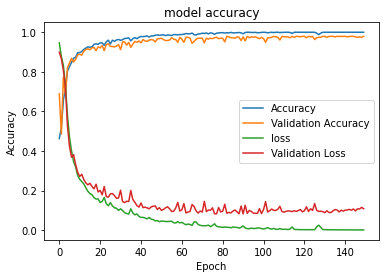

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# serialize the# serialize the model to disk


print("[INFO] serializing network...")
model.save("potato_model_1.0.model.h5")

[INFO] serializing network...


unseen data

In [ ]:
#import the necessary packages
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# # load the model 
print("[INFO] loading network and...")
model=load_model('potato_model_1.0.model.h5')

[INFO] loading network and...


In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:


# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle them 
testImagePaths = sorted(list(paths.list_images('Dataset1')))   # data folder with 3 categorical folders


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        image = cv2.imread(imagePath)
        output = image.copy()
        output = imutils.resize(output, width=400)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(256,256))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0
        image= img_to_array(image)
        image=np.expand_dims(image,axis=0)
        
        # make a prediction on the image
        preds = model.predict(image)[0]
        # find the class label index with the largest corresponding probability
        i = np.argmax(preds)
        label = Classes[i]

        # draw the prediction on the output image
        text = "{}: {:.2f}%".format(label, preds[i] * 100)
        cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6,
            (0, 255, 0), 2)
        #plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
         # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.